# Tamaños de cache
### LEE ATENTAMENTE ESTE `notebook` EJECUTANDO SUS CELDAS. COMPLETA Y CONTESTA LAS CELDAS QUE CORRESPONDAN

Asegúrate de que estás ejecutando el código de este _notebook_ en la máquina y desde el directorio que quieres

**$\rightarrow$ ejecuta** (`shift` + `return`)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

!echo "HOSTNAME     " `hostname`; 
!echo "CURRENT DIR  " `pwd`

In [9]:
%%writefile files/cache_size_example.c

#include <stdlib.h>
#include "rlxutils.h"

int main(int argc, char **argv) {
  struct timespec tsi, tsf;

  long KB = 1024;
  long N = 20;
  long P2 = 16;

  long i,j,l,k;

  double time_difs[N];

    char *fname = "files/cache_size.data";
    printf ("writing to file %s\n", fname);
    FILE *f = fopen(fname, "w");

    fprintf(f, "iteration array_size total_elapsed_time\n");

    for (j=1; j<P2; j++) {
        long arrayLength = power(2,j-1)*KB;

        long lengthMod = arrayLength - 1;
        long steps =  16 * 1024 * 1024;

        for (l=0;l<N;l++)time_difs[l]=0;

        for (l=0;l<N; l++) {

            char *arr = malloc(arrayLength*sizeof(char));

            current_utc_time(&tsi);
            for (i=0; i<steps; i++) {
                long idx =(i*64) & lengthMod;       
                arr[idx]++;
            }
            current_utc_time(&tsf);


            time_difs[l] = get_time_diff(tsi, tsf);
            free(arr);
        }
        fprintf (f, "%ld %ld %lf\n", j, arrayLength/1024, avg(time_difs,N));
    }
    return 0; 

}


Overwriting files/cache_size_example.c


In [ ]:
!make -f m/Makefile-p1.4 clean all

In [12]:
!./files/cache_size_example

writing to file files/cache_size.data


In [ ]:
file_name="files/cache_size.data"
df = pd.read_csv(file_name, sep=" ")
iteration           = df['iteration']
total_elapsed_time  = df['total_elapsed_time']
array_size          = df['array_size']
df

In [ ]:
ax = plt.figure(figsize=(10,5)).add_subplot(111)
p,  = ax.plot(df.index, total_elapsed_time, linewidth=3, alpha=0.5)
ax.set_xticks(df.index)
ax.set_xticklabels(array_size)
ax.set_xlabel("array size (KB)")
ax.set_ylabel("secs")
ax.legend([p], ["elapsed time"])

# PREGUNTAS (consulta la referencia más abajo): 
Contesta las siguientes preguntas ejecutando este notebook en **GUANE**
* ¿Qué tamaños tienen las cachés L1, L2 y L3 en el sistema? **Por chip y total**
* Busca en internet las especificaciones técnicas del procesador y explica cómo los verificas con los datos obtenidos desde tu sistema operativo
* ¿Cómo interpretas la gráfica anterior en función de los tamaños de las cachés L1, L2 y L3?

Contesta las siguientes preguntas ejecutando este notebook en **la máquina virtual del curso**
* ¿qué procesador ves? ¿qué tamaños de caché ves?
* Si puedes aumenta el número de procesadores virtual de tu máquina virtual y vuelve a ejecutar los comandos más abajo. ¿cuantos procesadores y cores ves?

--- TU RESPUESTA AQUí (double click) ---

### Referencia
con los comandos `lshw` y `lscpu` en Linux obtenemos información de nuestros procesadores.

con el comando `sysctl` obtenemos información similar en MacOS

In [1]:
# ---- usa este comando si estás en Linux
!lshw -class processor; lscpu
# ---- usa este comando si estás en MacOS
#! sysctl -a|grep -i ^hw


/bin/sh: 1: lshw: not found
Architecture:          i686
CPU op-mode(s):        32-bit
Byte Order:            Little Endian
CPU(s):                2
On-line CPU(s) list:   0,1
Thread(s) per core:    1
Core(s) per socket:    2
Socket(s):             1
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 69
Model name:            Intel(R) Core(TM) i5-4260U CPU @ 1.40GHz
Stepping:              1
CPU MHz:               1999.999
BogoMIPS:              3999.99
Hypervisor vendor:     KVM
Virtualization type:   full
L1d cache:             32K
L1i cache:             32K
L2 cache:              256K
L3 cache:              3072K


En general las existe una cache **L1** y otra **L2** en cada core, y son compartidas por todos los __threads__ o __hyprthreads__ de cada core. La lógica del procesador se encarga de mantener la coherencia entre las cachés de distintos cores. 

La caché **L3** es compartida por todos los cores de un procesador

---
Especificaciones técnicas de la serie de procesadores **Intel Xeon 5600** [enlace](http://www.intel.com/content/dam/www/public/us/en/documents/datasheets/xeon-5600-vol-1-datasheet.pdf)

---
Esta es una disposición típica de las cachés en un chip multicore

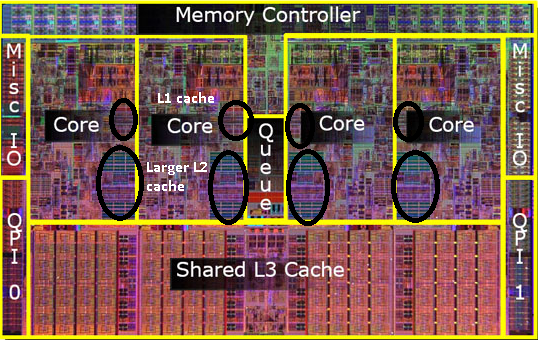

In [6]:
Image(filename='imgs/caches.png')